In [3]:
# Python Software Package Installation
import sys
!{sys.executable} -m pip install adafruit-blinka adafruit-circuitpython-msa301 hidapi adafruit-circuitpython-lsm303-accel ipympl

# Set an Environment Variable so Adafruit Blinka knows we're using the MCP2221
import os
os.environ["BLINKA_MCP2221"] = "1"

In [4]:
import board
import busio
import adafruit_lsm303_accel

i2c = busio.I2C(board.SCL, board.SDA)
accel = adafruit_lsm303_accel.LSM303_Accel(i2c)

### Next, let's check that we can read acceleration data from the sensor

In [5]:
print("Acceleration (m/s^2): X=%0.3f Y=%0.3f Z=%0.3f"%accel.acceleration)


Acceleration (m/s^2): X=-2.180 Y=-0.344 Z=9.409


<IPython.core.display.Javascript object>


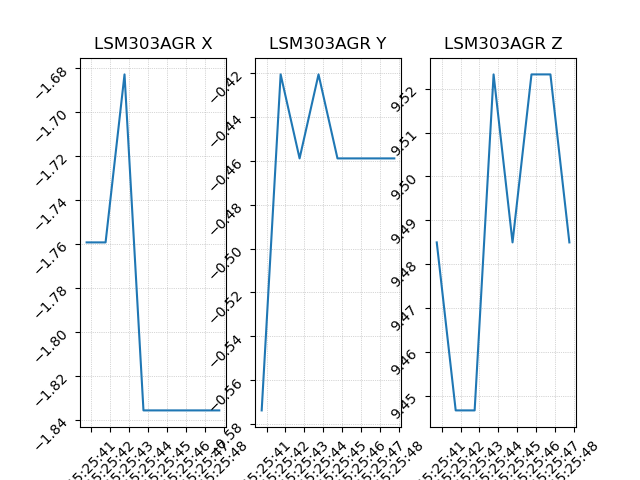

In [19]:
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from collections import deque
from matplotlib import animation, rc
from matplotlib.animation import FuncAnimation
%matplotlib notebook

# How many sensor samples we want to store
HISTORY_SIZE = 20

# Global x-axis array
x_vals = deque(maxlen=HISTORY_SIZE)

# Accelerometer data
accel_x = deque(maxlen=HISTORY_SIZE)
accel_y = deque(maxlen=HISTORY_SIZE)
accel_z = deque(maxlen=HISTORY_SIZE)

# Create 3 side-by-side subplots
fig, (ax1, ax2, ax3) = plt.subplots(1,3)


def animate(i):
    # Poll the LSM303AGR
    accel_data = accel.acceleration
    # Add the X/Y/Z values to the accel arrays
    accel_x.append(accel_data[0])
    accel_y.append(accel_data[1])
    accel_z.append(accel_data[2])
    
    # Grab the datetime, auto-range based on length of accel_x array
    x = [datetime.datetime.now() + datetime.timedelta(seconds=i) for i in range(len(accel_x))]
    
    ax1.cla()
    ax2.cla()
    ax3.cla()

    # Set grid titles
    ax1.set_title('LSM303AGR X')
    ax2.set_title('LSM303AGR Y')
    ax3.set_title('LSM303AGR Z')
   
    # Enable subplot grid lines
    ax1.grid(True, linewidth=0.5, linestyle=':')
    ax2.grid(True, linewidth=0.5, linestyle=':')   
    ax3.grid(True, linewidth=0.5, linestyle=':')
    
    # Rotate the X-tick
    ax1.tick_params(labelrotation=45)
    ax2.tick_params(labelrotation=45)
    ax3.tick_params(labelrotation=45)
    
    # Display the sub-plots
    ax1.plot(x, accel_x)
    ax2.plot(x, accel_y)
    ax3.plot(x, accel_z)


# Update graph every 125ms
ani = animation.FuncAnimation(plt.gcf(), animate, interval=50)
